# Surrogate Quality
This notebook produces a figure like:

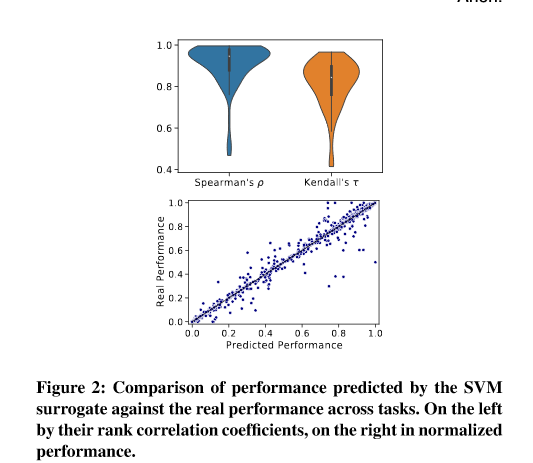

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

This notebook uses the data generated by the `Surrogates` notebook.

[Text(0, 0, "Spearman's $\\rho$"), Text(1, 0, "Kendall's $\\tau$")]

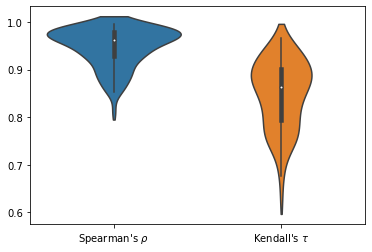

In [12]:
learner = "svm"
surrogate_quality = pd.read_csv(f"../data/surrogate_quality/rho_{learner}.csv")
used_surrogates = surrogate_quality[surrogate_quality.rho > 0.8]
rank_metrics = used_surrogates[['rho', 'tau']]
ax = sns.violinplot(data=rank_metrics, cut=1.0)
ax.set_xticklabels([r"Spearman's $\rho$", r"Kendall's $\tau$"])

The second plot shows, per the paper:
> For each task 10 configurations were sampled as a test set, and a surrogate model was trained on the remainder of the meta data for that task. On the right in Figure 2 the predicted normalized performance is shown against the real normalized performance.

In [18]:
import os
import sys
sys.path.append("./src/")
if "Figures" in os.getcwd():
    os.chdir("..")

In [21]:
from problem import Problem
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
learner = "svm"
problem = Problem(f"mlr_{learner}")
modeled_hyperparameters = set(problem.hyperparameters) - set(problem.fixed)

In [50]:
scores = dict()
for task in problem.data.task_id.unique():
    task_data = problem.data[problem.data.task_id == task].copy()
    target = task_data["target"] # negated so we can maximize
    task_data["target"] = (target - min(target)) / (max(target)-min(target))
    
    x, y = task_data[modeled_hyperparameters], task_data["target"]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=10, random_state=42)
    
    surrogate = RandomForestRegressor(n_estimators=100)
    surrogate.fit(x_train, y_train)
    y_pred = surrogate.predict(x_test)
    
    scores[task] = dict(predicted=y_pred, actual=y_test)

In [54]:
import itertools
predicted = itertools.chain(*(score["predicted"] for task, score in scores.items()))
actual = itertools.chain(*(score["actual"] for task, score in scores.items()))

<AxesSubplot:xlabel='Predicted Performance', ylabel='Actual Performance'>

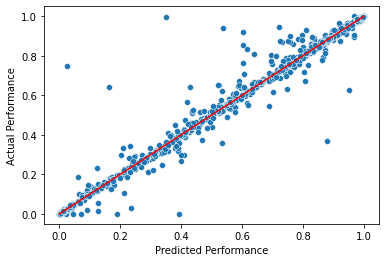

In [55]:
ax = sns.scatterplot(x=predicted, y=actual)
ax.set_xlabel("Predicted Performance")
ax.set_ylabel("Actual Performance")
sns.lineplot(x=[0, 1], y=[0, 1], color='red')

In [ ]:
pd.DataFrame.from

In [ ]:
sns.scatterplot()